In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [151]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [169]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeCategory
0,1,Male,19,15,39,18-29
1,2,Male,21,15,81,18-29
2,3,Female,20,16,6,18-29
3,4,Female,23,16,77,18-29
4,5,Female,31,17,40,30-39


In [170]:
df.tail

<bound method NDFrame.tail of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    AgeCategory  
0         18-29  
1         18-29  
2  

In [152]:
df.shape

(200, 5)

In [153]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [171]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [154]:
# Check 
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [155]:
# Check duplicate rows
df.duplicated().any()

False

In [156]:
# Mean Annual Income by gender
mean_income = df.groupby('Gender')['Annual Income (k$)'].mean().reset_index()
mean_income

,Gender,Annual Income (k$)
0,Female,59.250000
1,Male,62.227273


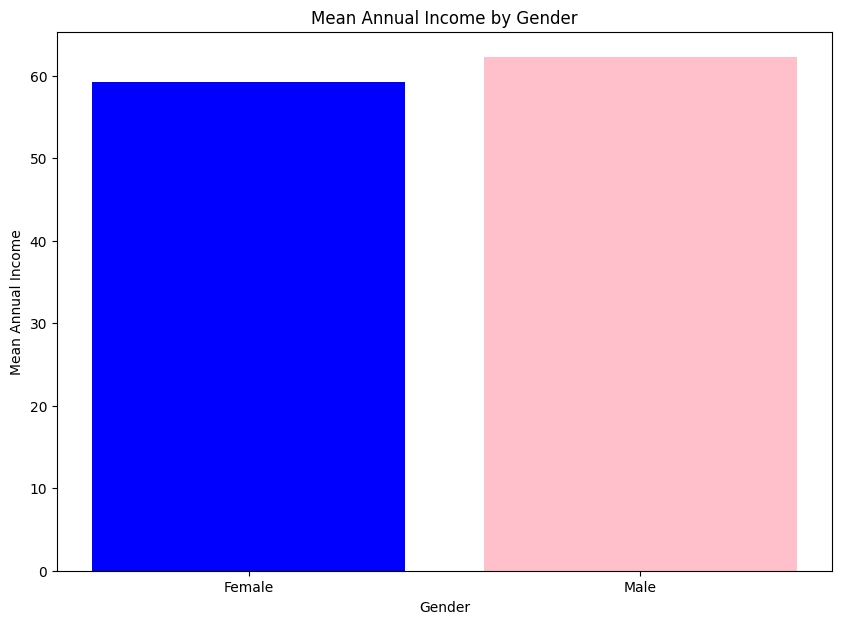

In [157]:
# Visual representation of Mean Annual Income by gender
plt.figure(figsize=(10,7))
plt.bar(mean_income['Gender'], mean_income['Annual Income (k$)'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income')
plt.title('Mean Annual Income by Gender')
plt.show()


In [158]:
mean_spending_score = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()
mean_spending_score

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


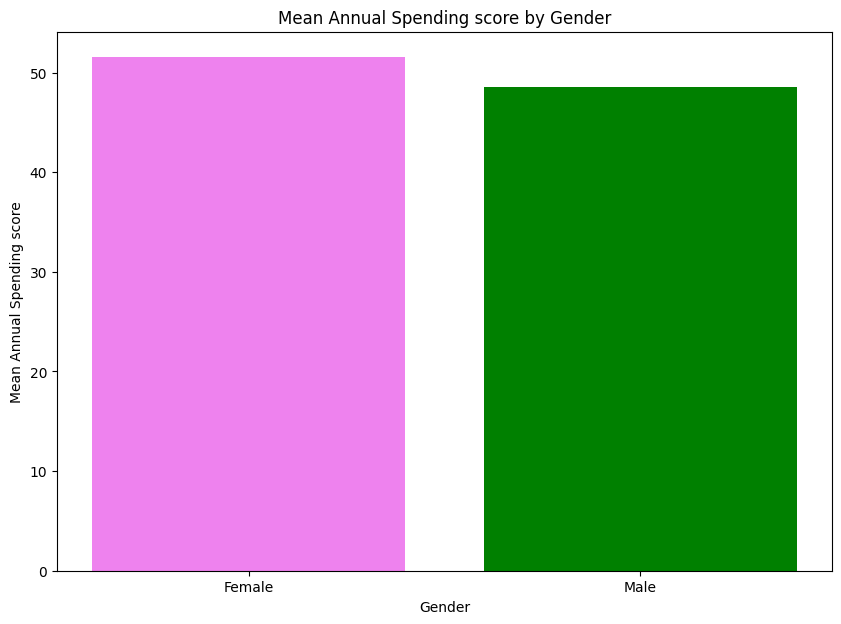

In [159]:

plt.figure(figsize=(10,7))
plt.bar(mean_spending_score['Gender'], mean_spending_score['Spending Score (1-100)'], color=['violet', 'green'])
plt.xlabel('Gender')
plt.ylabel('Mean Annual Spending score')
plt.title('Mean Annual Spending score by Gender')
plt.show()

In [160]:
# Highest 5 annual income per gender
highest5 = (
    df.nlargest(5, 'Annual Income (k$)')  # get 5 largest
      [['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
      .sort_values('Annual Income (k$)', ascending=False)  # ensure ordered highest→lower
      .reset_index(drop=True)
)
print(highest5.to_string(index=False))

 CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
        199   32                 137                      18
        200   30                 137                      83
        197   45                 126                      28
        198   32                 126                      74
        195   47                 120                      16


In [161]:
# Lowest 5 annual income per gender
lowest5 = (
    df.nsmallest(5, 'Annual Income (k$)')  # get 5 smallest
      [['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
      .sort_values('Annual Income (k$)', ascending=True)  # ensure ordered lowest→higher
      .reset_index(drop=True)
)
print(lowest5.to_string(index=False))

 CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
          1   19                  15                      39
          2   21                  15                      81
          3   20                  16                       6
          4   23                  16                      77
          5   31                  17                      40


In [162]:
# Highest 5 spending scores per gender
highest5_spend = (
    df.groupby('Gender', group_keys=False)
      .apply(lambda g: g.nlargest(5, 'Spending Score (1-100)')[
          ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
      ])
      .reset_index(drop=True)
)

print(highest5_spend.to_string(index=False))

 CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
         12   35                  19                      99
         20   35                  23                      98
        168   33                  86                      95
          8   23                  18                      94
        164   31                  81                      93
        146   28                  77                      97
        186   30                  99                      97
        128   40                  71                      95
        142   32                  75                      93
         34   18                  33                      92


In [163]:
# Lowest 5 spending scores per gender
lowest5_spend = (
    df.groupby('Gender', group_keys=False)
      .apply(lambda g: g.nsmallest(5, 'Spending Score (1-100)')[
          ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
      ])
      .reset_index(drop=True)
)

print(lowest5_spend.to_string(index=False))

 CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
         23   46                  25                       5
        141   57                  75                       5
          3   20                  16                       6
          7   35                  18                       6
        137   44                  73                       7
        157   37                  78                       1
        159   34                  78                       1
          9   64                  19                       3
         31   60                  30                       4
         33   53                  33                       4


In [164]:
df['Age'].max()

70

In [165]:
df['Age'].min()

18

In [168]:
bins = [18, 29, 39, 49, 59, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

# Bucket ages
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Aggregate: mean spending score and count per age category
summary = df.groupby('AgeCategory')['Spending Score (1-100)'] \
            .agg(mean_score='mean', n='count') \
            .reset_index()

# Sort by mean score
summary_sorted = summary.sort_values('mean_score')

print("Spending score by age category (ascending):")
print(summary_sorted.to_string(index=False, formatters={
    'mean_score': '{:.2f}'.format,
    'n': '{}'.format
}))

# Lowest and highest
low = summary_sorted.iloc[0]
high = summary_sorted.iloc[-1]

print(f"\nLowest avg spending score: {low.AgeCategory} -> {low.mean_score:.2f} (n={int(low.n)})")
print(f"Highest avg spending score: {high.AgeCategory} -> {high.mean_score:.2f} (n={int(high.n)})")

Spending score by age category (ascending):
AgeCategory mean_score  n
      50-59      34.72 25
      40-49      34.95 39
      60-70      43.00 20
      18-29      58.58 55
      30-39      61.10 61

Lowest avg spending score: 50-59 -> 34.72 (n=25)
Highest avg spending score: 30-39 -> 61.10 (n=61)
